In [286]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from scipy import stats

import csv
from scipy.optimize import curve_fit
import pandas as pd
import pylab as pl
import matplotlib.patches as patches
from matplotlib.path import Path
import matplotlib as mpl

# These defaults are the ones I like, but feel free to adapt or delete them
sns.set_style('white')
sns.set_context('talk')

# Define probability functions

In [287]:
def gaussian(x, mu, sig, A, N):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2) * A *N

In [288]:
def normalization_avg(sigma_1, sigma_2):
    return (((sigma_1/sigma_2)+(sigma_2/sigma_1))/2.)
#    return ((sigma_1/sigma_2))*(((sigma_1/sigma_2)+(sigma_2/sigma_1))/2.)


def normalization(sigma_1, sigma_2):
    return ((sigma_1/sigma_2))

# Asymmetric Gaussian for asymmetric error bars

A_l =  2.0
A_u =  1.0
N =  0.666666666667


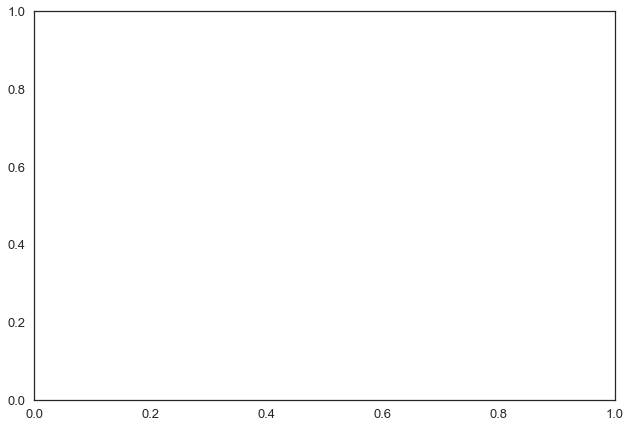

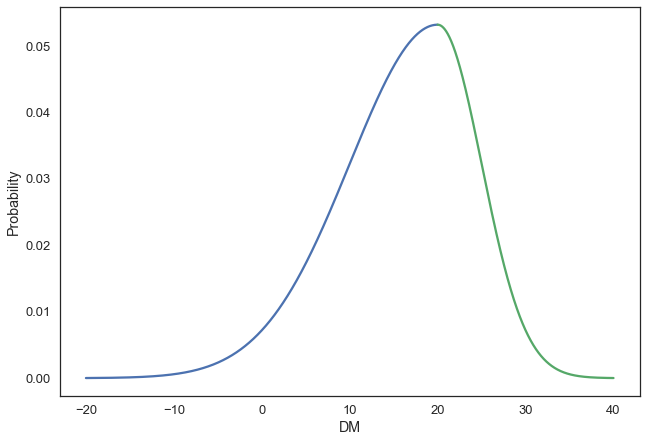

In [235]:
fig, ax = plt.subplots()

sigma_u = 5.
sigma_l = 10.
DM_c = 20.

x_l = np.arange(-20,DM_c,0.0001)
x_u = np.arange(DM_c, DM_c*2, 0.0001)


A_l = normalization(sigma_l, sigma_u)   #normalization_avg(sigma_l,sigma_u) #* normalization(sigma_l, sigma_u) #put sigma in reverse order
A_u = 1.#normalization(sigma_u, sigma_l)                                #normalization_avg(sigma_u,sigma_l) * normalization(sigma_u, sigma_l)
print "A_l = ", A_l
print "A_u = ", A_u

N = 1/((A_l/2.)+(A_u/2.))
#N = 1.
print "N = ", N

gaus_l = gaussian(x_l, DM_c, sigma_l, A_l, N)
gaus_u = gaussian(x_u, DM_c, sigma_u, A_u, N)

fig, ax = plt.subplots()
ax.plot(x_l, gaus_l)
ax.plot(x_u, gaus_u)
ax.set_xlabel("DM")
ax.set_ylabel("Probability")
plt.show()

In [236]:
import scipy.integrate as integrate
from scipy.integrate import quad

I_l = quad(gaussian, -np.inf, DM_c, args=(DM_c, sigma_l, A_l, N))
print "I = ", I_l
I_u = quad(gaussian, DM_c, np.inf, args=(DM_c, sigma_u, A_u, N))
print "I = ", I_u

I_tot = I_l[0] + I_u[0]
print "I_tot = ", I_tot

I =  (0.6666666666666667, 5.947808506317345e-10)
I =  (0.33333333333333337, 4.862941610373642e-10)
I_tot =  1.0


In [263]:
def tophat(DM_l, DM_u, N):
    return (1/(DM_u - DM_l))*N

In [267]:
def normalization_tophat(DM_up, DM_low, sigma):
    return (np.sqrt(2.*np.pi)*sigma)/(DM_up - DM_low)

# error ranges with gaussian drop off

N  0.409615937648
tophat [ 0.0204808  0.0204808  0.0204808 ...,  0.0204808  0.0204808  0.0204808]


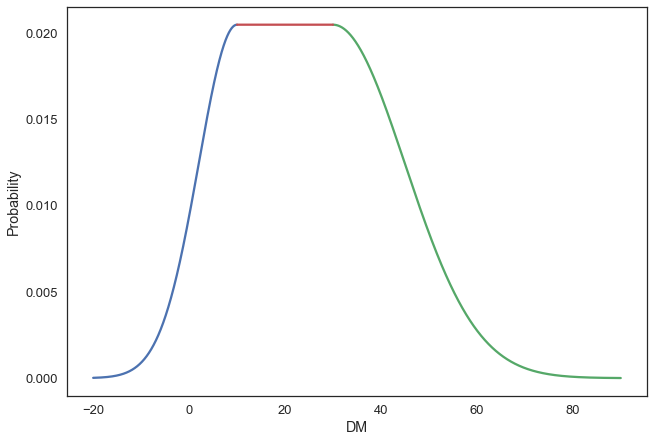

In [284]:
DM_l = 10.
DM_u = 30.
sigma_l = 8.
sigma_u = 15.

x_l = np.arange(-20,DM_l,0.0001)
x_c = np.arange(DM_l, DM_u, 0.0001)
x_u = np.arange(DM_u, DM_u*3, 0.0001)

A_l = normalization_tophat(DM_u, DM_l, sigma_l)
A_u = normalization_tophat(DM_u, DM_l, sigma_u)
N = 1/((A_l/2.)+(A_u/2.)+1)
print "N ", N

gaus_l = gaussian(x_l, DM_l, sigma_l, A_l, N)
gaus_u = gaussian(x_u, DM_u, sigma_u, A_u, N)
box = np.array([tophat(DM_l, DM_u, N) for i in xrange(len(x_c))]) 
print "tophat", box

fig, ax = plt.subplots()
ax.plot(x_l, gaus_l)
ax.plot(x_u, gaus_u)
ax.plot(x_c, box)
ax.set_xlabel("DM")
ax.set_ylabel("Probability")
plt.show()

In [276]:
def integrand(x,b):
    return x + b

In [285]:
I_l = quad(gaussian, -np.inf, DM_l, args=(DM_l, sigma_l, A_l, N))
print "I = ", I_l
I_u = quad(gaussian, DM_u, np.inf, args=(DM_u, sigma_u, A_u, N))
print "I = ", I_u
surface = box[0] *(DM_u-DM_l)
print "I = ", surface

I_tot = I_l[0] + I_u[0] + surface
print "I_tot = ", I_tot

I =  (0.20535097820947398, 1.0156100454716953e-10)
I =  (0.3850330841427637, 2.598511658935393e-10)
I =  0.409615937648
I_tot =  1.0
